# Measures of Variability

## Objectives

- Learn to calculate and interpret critical measures of variability such as variance, standard deviation, range, and interquartile range using Python.
- Develop skills to visualize data variability and distribution characteristics.
- Understand the implications of variability measures on data interpretation and decision-making.

## Background

This notebook introduces measures of variability, which quantify the spread of data points around a central value. Using Python, students will explore how to compute variance, standard deviation, range, and interquartile range. These measures are crucial for assessing the consistency or diversity within datasets, influencing how data distributions are analyzed and interpreted.

## Datasets Used

The course utilizes the `student-mat.csv` dataset, which includes detailed information on student performance metrics from two high schools in Portugal. 

## Introduction

Measures of Variability are statistics that describe the amount of difference and spread in a data set. 

These measures include variance, standard deviation, range, interquartile range, among others.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

## The Data

Variance measures how far a set of numbers is spread out from their mean value.

In [2]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,...,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,...,3,6,5,6,6
1,GP,F,17,U,GT3,...,3,4,5,5,6
2,GP,F,15,U,LE3,...,3,10,7,8,10
3,GP,F,15,U,GT3,...,5,2,15,14,15
4,GP,F,16,U,GT3,...,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [3]:
data = data[['G1','G2','G3','school','sex']]
print(data.shape)
data.head()

(395, 5)


,G1,G2,G3,school,sex
0,5,6,6,GP,F
1,5,5,6,GP,F
2,7,8,10,GP,F
3,15,14,15,GP,F
4,6,10,10,GP,F


## Variance

In [4]:
# Calculating the variance for levels of sex, ignoring school
data.groupby('sex').var(numeric_only=True)

,G1,G2,G3
sex,,,
F,10.45,13.26,21.37
M,11.51,14.96,20.21


In [5]:
# Calculating the variance for levels of school
data.groupby('school').var(numeric_only=True)

,G1,G2,G3
school,,,
GP,11.02,14.50,21.39
MS,11.20,11.41,17.95


In [6]:
# Computing the variance for levels of school and sex
data.groupby(['sex', 'school']).var()

G1    G2    G3
sex school                  
F   GP      9.95 13.30 21.20
    MS     14.58 13.56 23.49
M   GP     11.96 15.58 21.11
    MS      7.55  9.35 12.19

In [7]:
# Computing the standar deviation for levels of school and sex
data.groupby(['sex', 'school']).std()

G1   G2   G3
sex school               
F   GP     3.15 3.65 4.60
    MS     3.82 3.68 4.85
M   GP     3.46 3.95 4.59
    MS     2.75 3.06 3.49

This is an example of samples from two different populations with the same mean but different variance. 

In [8]:
sample1 = np.random.normal(0, 10, 1000)
sample2 = np.random.normal(0, 50, 1000)

The blue population is much more dispersed than the red one.

In [9]:
print('Variance of sample1 = %.2f' %(np.var(sample1)))
print('Variance of sample2 = %.2f' %(np.var(sample2)))

Variance of sample1 = 99.13
Variance of sample2 = 2766.00


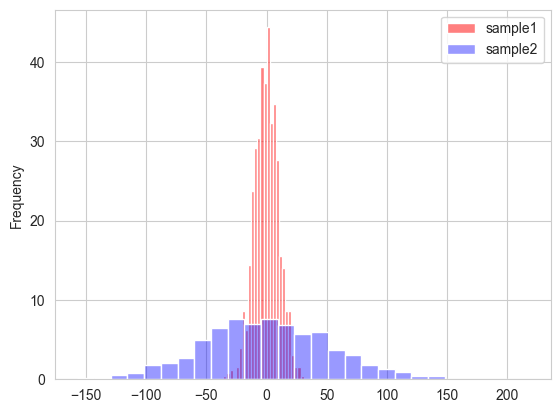

In [10]:
sns.histplot(sample1, stat='frequency', color='red',  alpha=0.5, label='sample1')
sns.histplot(sample2, stat='frequency', color='blue', alpha=0.4, label='sample2')
plt.legend();

Using kdeplot:

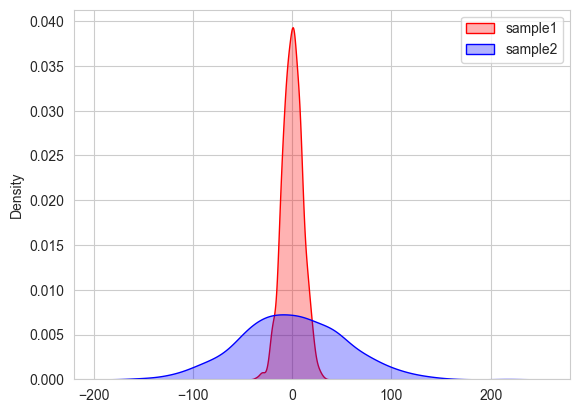

In [11]:
sns.kdeplot(sample1, fill=True, color='red',  alpha=0.3, label='sample1')
sns.kdeplot(sample2, fill=True, color='blue', alpha=0.3, label='sample2')
plt.legend();

**Variance** is a measurement of the spread among numbers in a data set. It measures how far each number in the set is from the mean.

This example returns the variance of the sample. 

In [12]:
print('Variance of G1 = %.3f' %(data.G1.var()))
print('Variance of G2 = %.3f' %(data.G2.var()))
print('Variance of G3 = %.3f' %(data.G3.var()))

Variance of G1 = 11.017
Variance of G2 = 14.149
Variance of G3 = 20.990


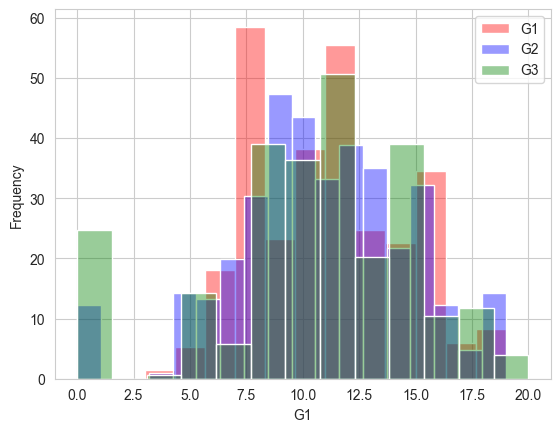

In [13]:
sns.histplot(data.G1, stat='frequency', color='red',   alpha=0.4, label='G1')
sns.histplot(data.G2, stat='frequency', color='blue',  alpha=0.4, label='G2')
sns.histplot(data.G3, stat='frequency', color='green', alpha=0.4, label='G3')
plt.legend();

It is hard to see diferences among histograms. Let's use kdeplot:

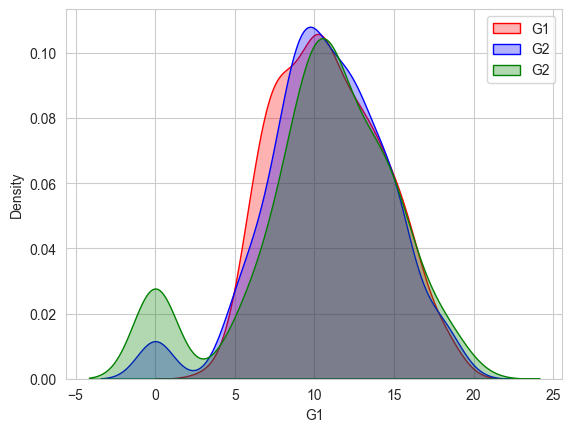

In [14]:
sns.kdeplot(data.G1, color='red',   fill=True, alpha=0.3, label='G1')
sns.kdeplot(data.G2, color='blue',  fill=True, alpha=0.3, label='G2')
sns.kdeplot(data.G3, color='green', fill=True, alpha=0.3, label='G2')
plt.legend();

## Standard Deviation

The `standard deviation` is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.

If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation.

In [15]:
print('sample1')
print('Variance = %.4f' %(np.var(sample1)))
print('Standard Deviation = %.4f' %(np.std(sample1)))
print('Standard Deviation Squared = %.4f' % np.std(sample1)**2)

sample1
Variance = 99.1332
Standard Deviation = 9.9566
Standard Deviation Squared = 99.1332


In [16]:
print('sample2')
print('Variance = %.4f' %(np.var(sample2)))
print('Standard Deviation = %.4f' %(np.std(sample2)))
print('Standard Deviation Squared = %.4f' % np.std(sample2)**2)

sample2
Variance = 2766.0038
Standard Deviation = 52.5928
Standard Deviation Squared = 2766.0038


 The **variance** is the square of the **standard deviation**.

Let's calculate the standard deviation of G1, G2, and G3

In [17]:
print('-G1-')
print('Variance           = %.4f' %(np.var(data.G1)))
print('Standard Deviation = %.4f' %(np.std(data.G1)))

-G1-
Variance           = 10.9892
Standard Deviation = 3.3150


In [18]:
print('-G2-')
print('Variance           = %.4f' %(np.var(data.G2)))
print('Standard Deviation = %.4f' %(np.std(data.G2)))

-G2-
Variance           = 14.1131
Standard Deviation = 3.7567


In [19]:
print('-G3-')
print('Variance           = %.4f' %(np.var(data.G3)))
print('Standard Deviation = %.4f' %(np.std(data.G3)))

-G3-
Variance           = 20.9365
Standard Deviation = 4.5756


## Range

In statistics, the **range** of a set of data is the difference between the largest and smallest value.

In [20]:
print('Range of G1 = %.2f' % (data.G1.max() - data.G1.min()))
print('Range of G2 = %.2f' % (data.G2.max() - data.G2.min()))
print('Range of G3 = %.2f' % (data.G3.max() - data.G3.min()))

Range of G1 = 16.00
Range of G2 = 19.00
Range of G3 = 20.00


## Interquartile Range

The **interquartile range (IQR)** measures variability by dividing a data set into quartiles.

The **interquartile range** is the difference between the third and first quartile in a data set, giving the middle 50%. 

In [21]:
print('-G1-')
print('Q1 =',np.percentile(data.G1, 25))
print('Q2 =',np.percentile(data.G1, 50))
print('Q3 =',np.percentile(data.G1, 75))
IQ_G1 = np.percentile(data.G1, 75) - np.percentile(data.G1, 25)
print('Interquartile Range = %i' %(IQ_G1))

-G1-
Q1 = 8.0
Q2 = 11.0
Q3 = 13.0
Interquartile Range = 5


In [22]:
print('-G2-')
print('Q1 =',np.percentile(data.G2, 25))
print('Q2 =',np.percentile(data.G2, 50))
print('Q3 =',np.percentile(data.G2, 75))
IQ_G2 = np.percentile(data.G2, 75) - np.percentile(data.G2, 25)
print('Interquartile Range = %i' %(IQ_G2))

-G2-
Q1 = 9.0
Q2 = 11.0
Q3 = 13.0
Interquartile Range = 4


In [23]:
print('-G3-')
print('Q1 =',np.percentile(data.G3, 25))
print('Q2 =',np.percentile(data.G3, 50))
print('Q3 =',np.percentile(data.G3, 75))
IQ_G3 = np.percentile(data.G3, 75) - np.percentile(data.G3, 25)
print('Interquartile Range = %i' %(IQ_G3))

-G3-
Q1 = 8.0
Q2 = 11.0
Q3 = 14.0
Interquartile Range = 6


The boxplots help us to see the interquartile range.

The width of the box is the interquartile range.

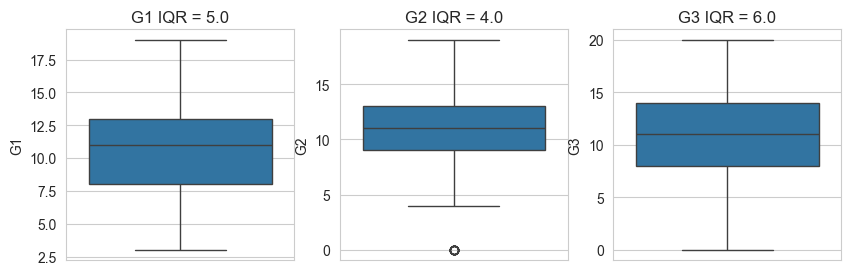

In [24]:
plt.figure(figsize=(10,3))

plt.subplot(131)
sns.boxplot(y=data.G1)
plt.title('G1 IQR = '+str(IQ_G1))

plt.subplot(132)
sns.boxplot(y=data.G2)
plt.title('G2 IQR = '+str(IQ_G2))

plt.subplot(133)
sns.boxplot(y=data.G3)
plt.title('G3 IQR = '+str(IQ_G3));

We can join the three boxplots in an only graph.

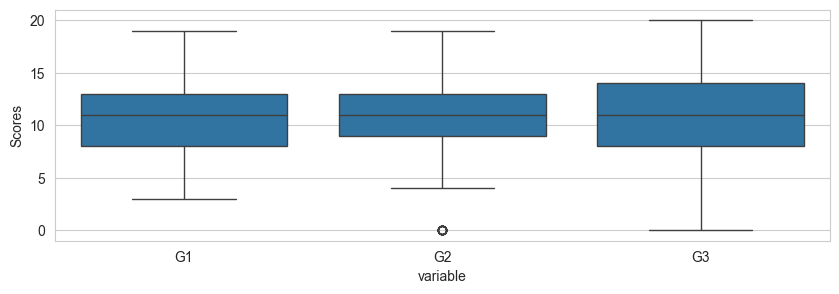

In [25]:
plt.figure(figsize=(10,3))
dd = pd.melt(data,value_vars=['G1', 'G2', 'G3'], value_name='Scores')
sns.boxplot(x=dd.variable,y=dd.Scores);

## Coefficient of variation

The **coefficient of variation (CV)**, also known as relative standard deviation, is a standardized measure of the dispersion of a probability distribution or frequency distribution.

The **coefficient of variation** is the ratio of the standard deviation to the mean.  

In [26]:
from scipy.stats import variation

In [27]:
print('Coefficient of variation of G1 = %.4f' %(variation(data.G1)))
print('Coefficient of variation of G2 = %.4f' %(variation(data.G2)))
print('Coefficient of variation of G3 = %.4f' %(variation(data.G3)))

Coefficient of variation of G1 = 0.3039
Coefficient of variation of G2 = 0.3506
Coefficient of variation of G3 = 0.4393


Using the formula:

In [28]:
print('-G1-')
print('Standar Deviation        = %.4f' %(data.G1.std()))
print('Mean                     = %.4f' %(data.G1.mean()))
print('Coefficient of variation = %.4f' %(data.G1.std()/data.G1.mean()))

-G1-
Standar Deviation        = 3.3192
Mean                     = 10.9089
Coefficient of variation = 0.3043


In [29]:
print('-G2-')
print('Standar Deviation        = %.4f' %(data.G2.std()))
print('Mean                     = %.4f' %(data.G2.mean()))
print('Coefficient of variation = %.4f' %(data.G2.std()/data.G2.mean()))

-G2-
Standar Deviation        = 3.7615
Mean                     = 10.7139
Coefficient of variation = 0.3511


In [30]:
print('-G3-')
print('Standar Deviation        = %.4f' %(data.G3.std()))
print('Mean                     = %.4f' %(data.G3.mean()))
print('Coefficient of variation = %.4f' %(data.G3.std()/data.G3.mean()))

-G3-
Standar Deviation        = 4.5814
Mean                     = 10.4152
Coefficient of variation = 0.4399


How can you interpret the **coefficient of variation**?

Let's see two examples:

**Group 1**: standard deviation = 50, mean =150

In [31]:
# Group 1:  
std_Group1  = 50
mean_Group1 = 150
print('The coefficient of variation of Group1 = %.4f' %(std_Group1/mean_Group1))

The coefficient of variation of Group1 = 0.3333


**Group 2**: standard deviation = 50, mean =500

In [32]:
# Group 2:  
std_Group2  = 50
mean_Group2 = 500
print('The coefficient of variation of Group2 = %.4f' %(std_Group2/mean_Group2))

The coefficient of variation of Group2 = 0.1000


Both groups have the same standard deviation. Despite this, Group1 has more variation than Group2.

A variation of 50 affects Group1 more than Group2. Both groups have the same standard deviation. Despite this, **Group1** has more variation than **Group2**.

A variation of 50 affects **Group1** more than **Group2**.

In [33]:
print('The coefficient of variation of Group1 = %.4f' %(std_Group1/mean_Group1))
print('The coefficient of variation of Group2 = %.4f' %(std_Group2/mean_Group2))

The coefficient of variation of Group1 = 0.3333
The coefficient of variation of Group2 = 0.1000


## Conclusions

Key Takeaways:
- Students will gain a comprehensive understanding of how variability is quantified and what it signifies about a dataset.
- Students will be proficient in calculating variance and standard deviation, understanding their role in data analysis, and how they differ when comparing groups or conditions.
- Students will learn to use Seaborn and matplotlib to plot distributions, which help them visualize the spread and shape of the data.
- The notebook provides insights into how measures of variability can influence interpretations of real-world data, such as academic performance, helping to make informed decisions based on statistical analysis.

## References

- Nussbaumer Knaflic, C. (2015) Storytelling with data. A data visualization guide for business professionals. USA: John Wiley & Sons. chapter 2
- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer